In [2]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import io
import os
import random as rd
from scipy.optimize import minimize
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import csv

C:\Users\dylan\AppData\Local\Temp\ipykernel_22756\3127720310.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
n = 10
def create_data_array(directory) :
    datalist = []
    for i in range(n):
        filename = os.listdir(directory)[i]
        if filename.endswith(".npy"):
            data_day = np.load(directory + '/' + filename)
        datalist.append(data_day)
    data_raw = np.concatenate(datalist,axis=0)
    return data_raw

data_raw = create_data_array(r'datatest')


[0 0 0 ... 0 0 0]
74.1255579868709 94.63130592006658
1032.009600000456
1020.4386171875367


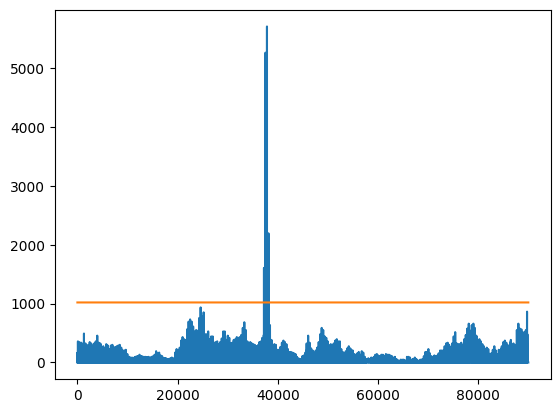

In [7]:
A_test = np.reshape(data_raw[2584,:,:],-1)
A_non_zero = A_test[A_test>0]
print(A_test)
mu = np.mean(A_non_zero)
sigma =np.std(A_non_zero)
print(mu,sigma)
Q = np.percentile(A_test,99.995)
print(Q)
Q25 = np.percentile(A_test,25)
Q75 = np.percentile(A_test,75)
IQR = Q75-Q25
frontier = mu + 10*sigma
print(frontier)
plt.plot(A_test)
plt.plot(range(len(A_test)),[frontier for i in range(len(A_test))])
plt.show()


[124, 41]
[125, 40]
[126, 39]
[127, 38]
[127, 40]


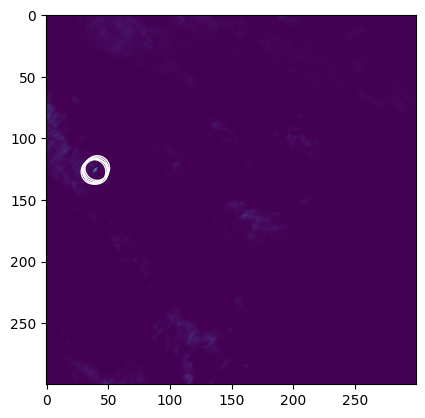

In [19]:
def csv_to_list(csv_file_path):
    data_list = []
    with open(csv_file_path, mode='r') as file:
        csv_reader = csv.reader(file)
        
        for row in csv_reader:
            row_list = [[int(num) for num in string.strip('[]').split()] for string in row]
            data_list.append(row_list)
    return data_list

outlier_list = csv_to_list('raw_data_output.csv')
fig, ax = plt.subplots()
im = ax.imshow(data_raw[2584,:,:])
for element in outlier_list[2584]:
                print(element)
                x=element[1]
                y=element[0]
                circle = plt.Circle((x,y), radius=10, edgecolor='white', facecolor='none')
                ax.add_patch(circle)

plt.show()


In [9]:
def export_list_to_csv(data, file_name):
    csv_file_path = file_name + ".csv"
    with open(csv_file_path, 'w', newline='') as csvfile:
        # Create a CSV writer object
        csv_writer = csv.writer(csvfile)
        
        # Write each sublist as a row in the CSV file
        for sublist in data:
            csv_writer.writerow(sublist)





In [10]:
def is_an_outlier(array):
    len = np.shape(array)[0]
    L = [[] for t in range(len)]
    for t in range(len):
        arrayt=array[t,:,:]
        arrayt_non_zero = arrayt[arrayt>0]
        frontier = np.mean(arrayt_non_zero)+8*np.std(arrayt_non_zero)
        A = list(np.argwhere(arrayt>frontier))
        L[t] = A
    return L

List = is_an_outlier(data_raw)

export_list_to_csv(List,"raw_data_output")



c:\Users\dylan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\dylan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\dylan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\dylan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\dylan\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rco

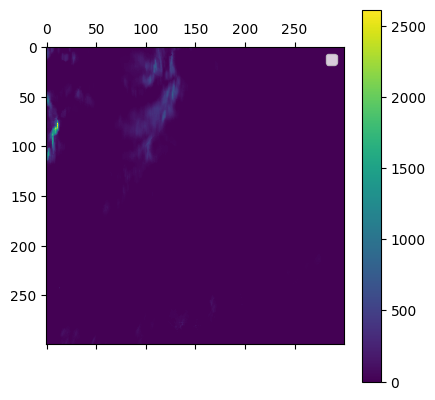

In [38]:
List = is_an_outlier(data_raw)
plt.matshow(data_raw[0])
plt.colorbar()
plt.legend()

In [ ]:
zip_file_path = "data/2018.zip"

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        all_files = zip_ref.namelist()
        for file in all_files:
            if file.endswith(".npy"):
                with zip_ref.open(file) as file_in_zip:
                    npy_bytes = file_in_zip.read()
                    npy_file_like = io.BytesIO(npy_bytes)
                    npy_array = np.load(npy_file_like)
                    print(npy_array)
                    npy_file_like.close()
